In [3]:
#COMP1050 Group Project Code
#Students:
# student number, full name
# student number, full name
# student number, full name
# student number, full name

In [4]:
#imports


In [5]:
#This file will contain all your project code which your group builds up over a number of weeks
#other files you have added in this repository can stay
#general advice:
#   - conform to your style gudelines that your group agreed to in week 8
#   - do not have large blocks of code... split up into reusable functions
#   - keep each function in a separate code block / cell
#   - have all your imports in the one place
#   - have your main algorithm (the thing that calls all your other functions) as the last block

In [13]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import signal

#code snippet 1
df = pd.read_csv('dataset_1.txt', sep=',', header=None)  # use pandas to read sensor data file
print('The dataset contains %d rows.' % len(df))
df.head() 



The dataset contains 245576 rows.


,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,0.092478,0.14400,-0.009739,231.24,42.410,181.19,-0.13840,-0.85828,0.101680,32.813,...,-6.607700,-15.092,38.214,-0.90671,-0.43698,-0.52616,-91.394,33.158,4.2875,1
1,0.057310,0.16003,-0.009739,238.56,51.564,174.59,-0.15410,-0.86636,0.069517,46.727,...,-5.143100,-18.021,37.482,-0.94272,-0.32132,-0.49881,-82.606,36.087,-1.5711,1
2,0.022143,0.18408,-0.038329,243.69,59.620,166.17,-0.15410,-0.89867,0.053434,57.346,...,-3.678400,-20.584,37.116,-0.92271,-0.21722,-0.46756,-75.283,37.552,-5.9651,1
3,-0.001302,0.20412,-0.030160,246.62,65.112,156.29,-0.16981,-0.90675,0.049414,65.768,...,-0.749080,-23.514,35.285,-0.89070,-0.13626,-0.45193,-69.424,37.552,-8.8945,1
4,-0.032562,0.20813,-0.026076,250.64,70.605,145.30,-0.16981,-0.90675,0.081579,69.063,...,-0.016749,-24.246,33.088,-0.89870,-0.10927,-0.48709,-63.566,39.017,-10.3590,1


In [14]:
def plotme(actNumber, devNumber):
    
    b, a = signal.butter(4, 0.04, 'low', analog=False)
    #Determine which Activity was selected
    if (actNumber == 1):
        activity = 'Siting'
    elif (x == 2):
        activity = 'Lying'
    elif (actNumber == 3):
        activity = 'Standing'
    elif (actNumber == 4):
        activity = 'Washing dishes'
    elif (actNumber == 5):
        activity = 'Vacuuming'
    elif (actNumber == 6):
        activity = 'Sweeping'
    elif (actNumber == 7):
        activity = 'Walking outside'
    elif (actNumber == 8):
        activity = 'Ascending stairs'
    elif (actNumber == 9):
        activity = 'Descending stairs'
    elif (actNumber == 10):
        activity = 'Treadmill running (8.3 km/h)'
    elif (actNumber == 11):
        activity = 'Bicycling (50 watt)'
    elif (actNumber == 12):
        activity = 'Bicycling (100 watt)'
    elif (actNumber == 13):
        activity = 'Rope jumping'        
    
    #Determine which Device was Selected
    if (devNumber == 0):
        device = 'Wrist: Accelerometer'
    elif (devNumber == 1):
        device = 'Wrist: Gyroscope'
    elif (devNumber == 2):
        device = 'Chest: Accelerometer'
    elif (devNumber == 3):
        device = 'Chest: Gyroscope'
    elif (devNumber == 4):
        device = 'Head: Accelerometer'
    elif (devNumber == 5):
        device = 'Head: Gyroscope'
    elif (devNumber == 6):
        device = 'Ankle: Accelerometer'
    elif (devNumber == 7):
        device = 'Ankle: Gyroscope'
    
    #Return Invalid if either Activity or Device were invalid options
    elif (y > 7) or (y < 0) or (x < 1) or (x > 13):
        print('Invalid')
    #Fill df_activity with the data pertaining to the chosen activity
    df_activity = df[df[24] == x].values
    #Create a blank array with the size of df_activity 500 - 1500 with the selected sensor data
    processed_array = np.zeros_like(df_activity[500:1500, (y*3):((y*3)+3)])
    
    #Fill the empty array with the filtered and smoothed data
    for i in range(np.size(df_activity[500:1500, (y*3):((y*3)+3)],1)):
        processed_array[:,i] = signal.lfilter(b, a, df_activity[500:1500, (y*3):((y*3)+3)][:, i])
        
    #Display Processed and Unprocessed Plots
    print('Activity is: ' + activity)
    print('Device is: ' + device)
    print('Unprocessed Data: ')
    plt.plot(df_activity[500:1500, (y*3):((y*3)+3)])
    plt.show()
    print('Processed Data: ')
    plt.plot(processed_array)
    plt.show()


In [11]:
def process_my_data(ndarray_values):
    # We have some pre-defined "smoothing" being used here
    b, a = signal.butter(4, 0.04, 'low', analog=False)

    # give me an area to store the updated values... same size as ndarray_values
    processed_array = np.zeros_like( ndarray_values )

    number_of_columns = np.size(ndarray_values,1) #how many columns?

    # do something to each column of data
    # don't worry about what it is doing to the data, just know that it is 
    # ... doing it one column at a time.
    for i in range( number_of_columns ): # equivalent to -> for i = 0; i < number_of_columns; i++
        processed_array[:,i] = signal.lfilter(b, a, ndarray_values[:, i])

    #return the processed_array so it can be used elsewhere
    return processed_array

Activity is: Siting
Device is: Wrist: Accelerometer
Unprocessed Data: 


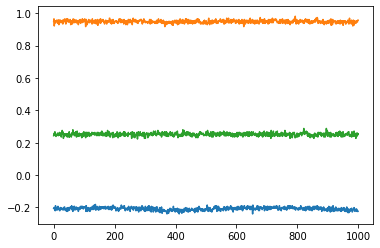

Processed Data: 


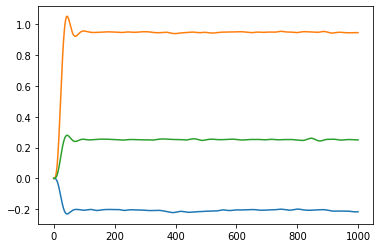

In [43]:
plotme(1,0)

In [ ]:
def create_training_data_from_files(list_of_filenames, output_filename):

    #create the empty training set where we are going to add our "features"
    training_set = np.empty(shape=(0, 10))
    
    for dataset_file in list_of_filenames:

        #import the file contents into a panadas data frame
        imported_data = pd.read_csv(dataset_file, sep=',', header=None)

        #generate "features" for each activitiy
        for activityNumber in range(1,14):
            
            #get all data relating to that activity and convert to a numpy ndarray
            activity_data = imported_data[imported_data[24] == activityNumber].values

            #smooth over the data for columns 0, 1, 2, ...23 (not column 24)
            b, a = signal.butter(4, 0.04, 'low', analog=False)
            for j in range(24):
                activity_data[:, j] = signal.lfilter(b, a, activity_data[:, j])
            
            #how many full rows of 1000 are there for this activity data?
            number_of_training_samples = int( len(activity_data)/1000 )
            print(  "File " + dataset_file +
                    " has " + str(number_of_training_samples) + " samples of 1000 rows"+
                    "for activity: " + str(activityNumber))
            
            #for each sample of 1000 rows... scan the data and add the scan results to training_set
            for sample_number in range(number_of_training_samples):
                #sample data (get the next 1000 rows and all the columns)
                sample_data = activity_data[ 
                                1000 * sample_number : 1000 * (sample_number + 1) , 
                                :
                            ]
                #we are about to build up a feature_sample that will have 10 columns
                feature_sample = []
                #sample from file 4 in week 7 prac
                for i in range(3):
                    feature_sample.append(np.min(sample_data[:, i]))
                    feature_sample.append(np.max(sample_data[:, i]))
                    feature_sample.append(np.mean(sample_data[:, i]))
                # add the activtiy number (The last column from the row of data)
                feature_sample.append(int(sample_data[0, -1])) 
                #make it in to an ndarray so it can be added to training data
                feature_sample = np.array([feature_sample]) 
                training_set = np.concatenate((training_set, feature_sample), axis=0)
            
    #now save all this training data into a file to be used at a later date
    df_training = pd.DataFrame(training_set)
    df_training.to_csv(output_filename, index=None, header=None)
    print('attempted to create '+ output_filename +' ... check if the file was created!')
    print(str(len(training_set)) + " data rows should be in the output file")
    
filenames = []
filenames.append('dataset_1.txt')
filenames.append('dataset_2.txt')
filenames.append('dataset_3.txt')
filenames.append('dataset_4.txt')
create_training_data_from_files(filenames,'week11_training_data_4Participants.csv')


In [ ]:
def create_testing_data_from_files(list_of_filenames, output_filename):

    #create the empty training set where we are going to add our "features"
    testing_set = np.empty(shape=(0, 10))
    
    for dataset_file in list_of_filenames:

        #import the file contents into a panadas data frame
        imported_data = pd.read_csv(dataset_file, sep=',', header=None)

        #generate "features" for each activitiy
        for activityNumber in range(1,14):
            
            #get all data relating to that activity and convert to a numpy ndarray
            activity_data = imported_data[imported_data[24] == activityNumber].values

            #smooth over the data for columns 0, 1, 2, ...23 (not column 24)
            b, a = signal.butter(4, 0.04, 'low', analog=False)
            for j in range(24):
                activity_data[:, j] = signal.lfilter(b, a, activity_data[:, j])
            
            #how many full rows of 1000 are there for this activity data?
            number_of_training_samples = int( len(activity_data)/1000 )
            print(  "File " + dataset_file +
                    " has " + str(number_of_training_samples) + " samples of 1000 rows"+
                    "for activity: " + str(activityNumber))
            
            #for each sample of 1000 rows... scan the data and add the scan results to training_set
            for sample_number in range(number_of_training_samples):
                #sample data (get the next 1000 rows and all the columns)
                sample_data = activity_data[ 
                                1000 * sample_number : 1000 * (sample_number + 1) , 
                                :
                            ]
                #we are about to build up a feature_sample that will have 10 columns
                feature_sample = []
                #sample from file 4 in week 7 prac
                for i in range(3):
                    feature_sample.append(np.min(sample_data[:, i]))
                    feature_sample.append(np.max(sample_data[:, i]))
                    feature_sample.append(np.mean(sample_data[:, i]))
                # add the activtiy number (The last column from the row of data)
                feature_sample.append(int(sample_data[0, -1])) 
                #make it in to an ndarray so it can be added to training data
                feature_sample = np.array([feature_sample]) 
                testing_set = np.concatenate((testing_set, feature_sample), axis=0)
            
    #now save all this training data into a file to be used at a later date
    df_testing = pd.DataFrame(testing_set)
    df_testing.to_csv(output_filename, index=None, header=None)
    print('attempted to create '+ output_filename +' ... check if the file was created!')
    print(str(len(testing_set)) + " data rows should be in the output file")

filenames = []
filenames.append('dataset_5.txt')
filenames.append('dataset_6.txt')
create_testing_data_from_files(filenames,'week11_testing_data_2Participants.csv')

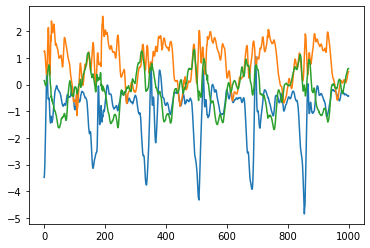

In [149]:
#plotting mystery data
df = pd.read_csv('mystery_activity_data_2.txt', sep=',', header=None)  # use pandas to read sensor data file
#df.head() 

%matplotlib inline
df_mysteryActivity = df.values 
plt.plot(df_mysteryActivity[500:1500, 0:3])